DEBUG ===========================  t = 0.0  =================================
DEBUG ---- 1) Distance en 3D ---
DEBUG - dx = x_moon - x_eart = 384400000.0
DEBUG - dy = y_moon - y_eart = 0.0
DEBUG - dz = z_moon - z_eart = 0.0
DEBUG - Distance = r = math.sqrt(dx*dx + dy*dy + dz*dz) = 384400000.0
DEBUG ---- 2) Force gravitationnelle scalaire ---
DEBUG - Force = G * M_EARTH * M_MOON / (r*r) = 1.9820928631306224e+20
DEBUG ---- 3) Composantes de la force ---
DEBUG - Vecteur Force: fx_moon = force * (dx / r) = 1.9820928631306224e+20
DEBUG - Vecteur Force: fx_moon = force * (dx / r) = 0.0
DEBUG - Vecteur Force: fx_moon = force * (dx / r) = 0.0
DEBUG ---- 4) Accélérations ---
DEBUG - ax_moon = fx_moon / M_MOON = 0.002697569121127186
DEBUG - ay_moon = fy_moon / M_MOON = 0.0
DEBUG - az_moon = fz_moon / M_MOON = 0.0
DEBUG - ax_earth = fx_earth / M_EARTH = -3.318871072639387e-05
DEBUG - ay_earth = fy_earth / M_EARTH = -0.0
DEBUG - az_earth = fz_earth / M_EARTH = -0.0
DEBUG ---- 5) Mise à jour vitess

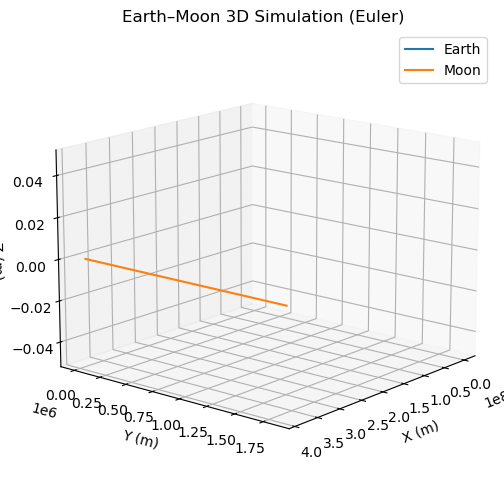

In [12]:
import math
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D  # nécessaire pour la 3D

# --- Constantes ---
G = 6.67430e-11             # Constante gravitationnelle
M_EARTH = 5.97219e24        # Masse de la Terre (kg)
M_MOON = 7.3477e22          # Masse de la Lune (kg)
debug = True

# --- Paramètres initiaux ---
# Positions (en m) - on place la Terre à l'origine
x_earth = 0.0
y_earth = 0.0
z_earth = 0.0

# On place la Lune à ~384 400 km sur l'axe X
# et 0 sur Y, Z
x_moon = 3.844e8
y_moon = 0.0
z_moon = 0.0

# Vitesses initiales (en m/s)
# On donne à la Lune une vitesse ~1,022 km/s
# perpendiculaire à l'axe X, par ex. sur l'axe Y
vx_earth = 0.0
vy_earth = 0.0
vz_earth = 0.0

vx_moon = 0.0
vy_moon = 1.022e3
vz_moon = 0.0

# Paramètres temporels
t = 0.0
dt = 600.0              # 60 s
T_MAX = 27.3 * 24 * 3600  # ~27,3 jours en secondes
if debug: T_MAX = 1800


# Listes pour tracer la trajectoire
times = []
earth_x, earth_y, earth_z = [], [], []
moon_x, moon_y, moon_z = [], [], []

while t <= T_MAX:
    if debug:
        print(f"DEBUG ===========================  t = {t}  =================================")

    # On enregistre l'état
    times.append(t)
    earth_x.append(x_earth)
    earth_y.append(y_earth)
    earth_z.append(z_earth)

    moon_x.append(x_moon)
    moon_y.append(y_moon)
    moon_z.append(z_moon)

    if debug:
        print("DEBUG ---- 1) Distance en 3D ---")

    # --- 1) Distance en 3D ---
    dx = x_moon - x_earth
    dy = y_moon - y_earth
    dz = z_moon - z_earth
    if debug:
                print(f"DEBUG - dx = x_moon - x_eart = {dx}")
                print(f"DEBUG - dy = y_moon - y_eart = {dy}")
                print(f"DEBUG - dz = z_moon - z_eart = {dz}")


    r = math.sqrt(dx*dx + dy*dy + dz*dz)
    if debug:
        print(f"DEBUG - Distance = r = math.sqrt(dx*dx + dy*dy + dz*dz) = {r}")

    if r == 0:
        # Collisions ou positions identiques
        force = 0.0
    else:
        # --- 2) Force gravitationnelle scalaire ---
        if debug:
            print("DEBUG ---- 2) Force gravitationnelle scalaire ---")
        force = G * M_EARTH * M_MOON / (r**2)
    if debug:
        print(f"DEBUG - Force = G * M_EARTH * M_MOON / (r*r) = {force}")

    # --- 3) Composantes de la force ---
    if debug:
        print("DEBUG ---- 3) Composantes de la force ---")
    # Vecteur unitaire = (dx/r, dy/r, dz/r)
    if r != 0:
        fx_moon = force * (dx / r)
        fy_moon = force * (dy / r)
        fz_moon = force * (dz / r)
        if debug:
            print(f"DEBUG - Vecteur Force: fx_moon = force * (dx / r) = {fx_moon}")
            print(f"DEBUG - Vecteur Force: fx_moon = force * (dx / r) = {fy_moon}")
            print(f"DEBUG - Vecteur Force: fx_moon = force * (dx / r) = {fz_moon}")
        
    else:
        fx_moon = 0.0
        fy_moon = 0.0
        fz_moon = 0.0

    # Force sur la Terre = - force sur la Lune (3e loi de Newton)
    fx_earth = -fx_moon
    fy_earth = -fy_moon
    fz_earth = -fz_moon

    # --- 4) Accélérations ---
    if debug:
        print("DEBUG ---- 4) Accélérations ---")
    ax_moon = fx_moon / M_MOON
    ay_moon = fy_moon / M_MOON
    az_moon = fz_moon / M_MOON
    if debug:
        print(f"DEBUG - ax_moon = fx_moon / M_MOON = {ax_moon}")
        print(f"DEBUG - ay_moon = fy_moon / M_MOON = {ay_moon}")
        print(f"DEBUG - az_moon = fz_moon / M_MOON = {az_moon}")
        
    ax_earth = fx_earth / M_EARTH
    ay_earth = fy_earth / M_EARTH
    az_earth = fz_earth / M_EARTH
    if debug:
        print(f"DEBUG - ax_earth = fx_earth / M_EARTH = {ax_earth}")
        print(f"DEBUG - ay_earth = fy_earth / M_EARTH = {ay_earth}")
        print(f"DEBUG - az_earth = fz_earth / M_EARTH = {az_earth}")
    
    # --- 5) Mise à jour vitesses (Euler) ---
    if debug:
        print("DEBUG ---- 5) Mise à jour vitesses (Euler) ---")
    
    vx_moon += ax_moon * dt
    vy_moon += ay_moon * dt
    vz_moon += az_moon * dt
    if debug:
        print(f"DEBUG - vx_moon += ax_moon * dt = {vx_moon}")
        print(f"DEBUG - vz_moon += az_moon * dt = {vy_moon}")
        print(f"DEBUG - vy_moon += ay_moon * dt = {vz_moon}")
    vx_earth += ax_earth * dt
    vy_earth += ay_earth * dt
    vz_earth += az_earth * dt
    if debug:
        print(f"DEBUG - vx_earth += ax_earth * dt = {vx_earth}")
        print(f"DEBUG - vz_earth += az_earth * dt = {vy_earth}")
        print(f"DEBUG - vy_earth += ay_earth * dt = {vz_earth}")    

    # --- 6) Mise à jour positions (Euler) ---
    if debug:
            print("DEBUG ---- 6) Mise à jour positions (Euler) ---")
    print(f"DEBUG - Old x_moon({x_moon})")
    x_moon += vx_moon * dt
    y_moon += vy_moon * dt
    z_moon += vz_moon * dt
    if debug:
        print(f"DEBUG - New x_moon({x_moon}) += vx_moon({vx_moon}) * dt({dt}) = {x_moon}")
        print(f"DEBUG - New z_moon += vz_moon * dt = {y_moon}")
        print(f"DEBUG - New y_moon += vy_moon * dt = {z_moon}")
    x_earth += vx_earth * dt
    y_earth += vy_earth * dt
    z_earth += vz_earth * dt
    if debug:
        print(f"DEBUG - New x_earth += x_earth * dt = {x_earth}")
        print(f"DEBUG - New z_earth += z_earth * dt = {y_earth}")
        print(f"DEBUG - New y_earth += y_earth * dt = {z_earth}")

    # --- 7) Avance du temps ---
    t += dt

# ===== Tracé 3D =====
fig = plt.figure(figsize=(8, 6))
ax = fig.add_subplot(111, projection='3d')

ax.plot(earth_x, earth_y, earth_z, label='Earth')
ax.plot(moon_x, moon_y, moon_z, label='Moon')

ax.set_xlabel('X (m)')
ax.set_ylabel('Y (m)')
ax.set_zlabel('Z (m)')
ax.set_title("Earth–Moon 3D Simulation (Euler)")
ax.legend()
ax.view_init(elev=15, azim=40)  # angle de vue (optionnel)
plt.show()
